In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv(r"D:\archive\german_credit_data.csv")

In [3]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
data.drop(columns= ["Unnamed: 0"], axis= 1, inplace=True)

In [5]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
data.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

In [10]:
null_df = check_missed_values(data)

In [11]:
null_df

,Feature,Percentage
0,Checking account,39.4
1,Saving accounts,18.3


The percentage of missing value in 2 categorical features are very high

In [12]:
data = data.fillna('unknown')

In [13]:
num_features = data._get_numeric_data().columns.tolist()
cat_features = data.drop(num_features, axis=1).columns.tolist()

In [14]:
for col in cat_features:
    print(data[col].unique())

['male' 'female']
['own' 'free' 'rent']
['unknown' 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' 'unknown' 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
['good' 'bad']


In [15]:
data["Job"].unique()

array([2, 1, 3, 0], dtype=int64)

Here the job column has only 4 values so we will turn it into categorical also

In [16]:
data['Job'] = data['Job'].astype('object')

In [17]:
num_features = data._get_numeric_data().columns.tolist()
cat_features = data.drop(num_features, axis=1).columns.tolist()

In [18]:
print(f'Numerical columns: {num_features}')
print(f'Categorical columns: {cat_features}')

Numerical columns: ['Age', 'Credit amount', 'Duration']
Categorical columns: ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


# EDA

Target distribution

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

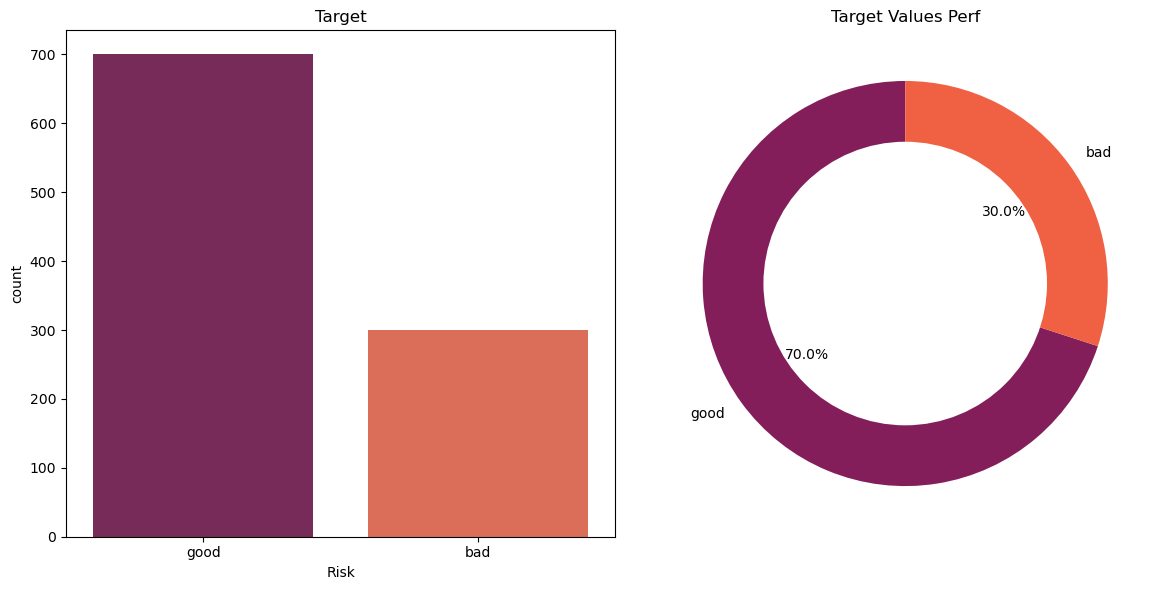

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='Risk', data=data, ax=ax[0], palette='rocket')
ax[0].set_title('Target')
colors = sns.color_palette('rocket', n_colors=data['Risk'].nunique())
risk_counts = data['Risk'].value_counts()
ax[1].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Target Values Perf')
plt.tight_layout()
plt.show()

The bad value accounts for 30% and the good value accounts for 70%. In my opinion, this is still the case of imbalanced dataset. However due to the threshold I have been given that the range of imbalanced dataset is < 15%. Therefore, I will not utilize the over-under_sampling for solving the imbalanced dataset. Instead, I will use this dataset for training the later model

Numerical data

c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


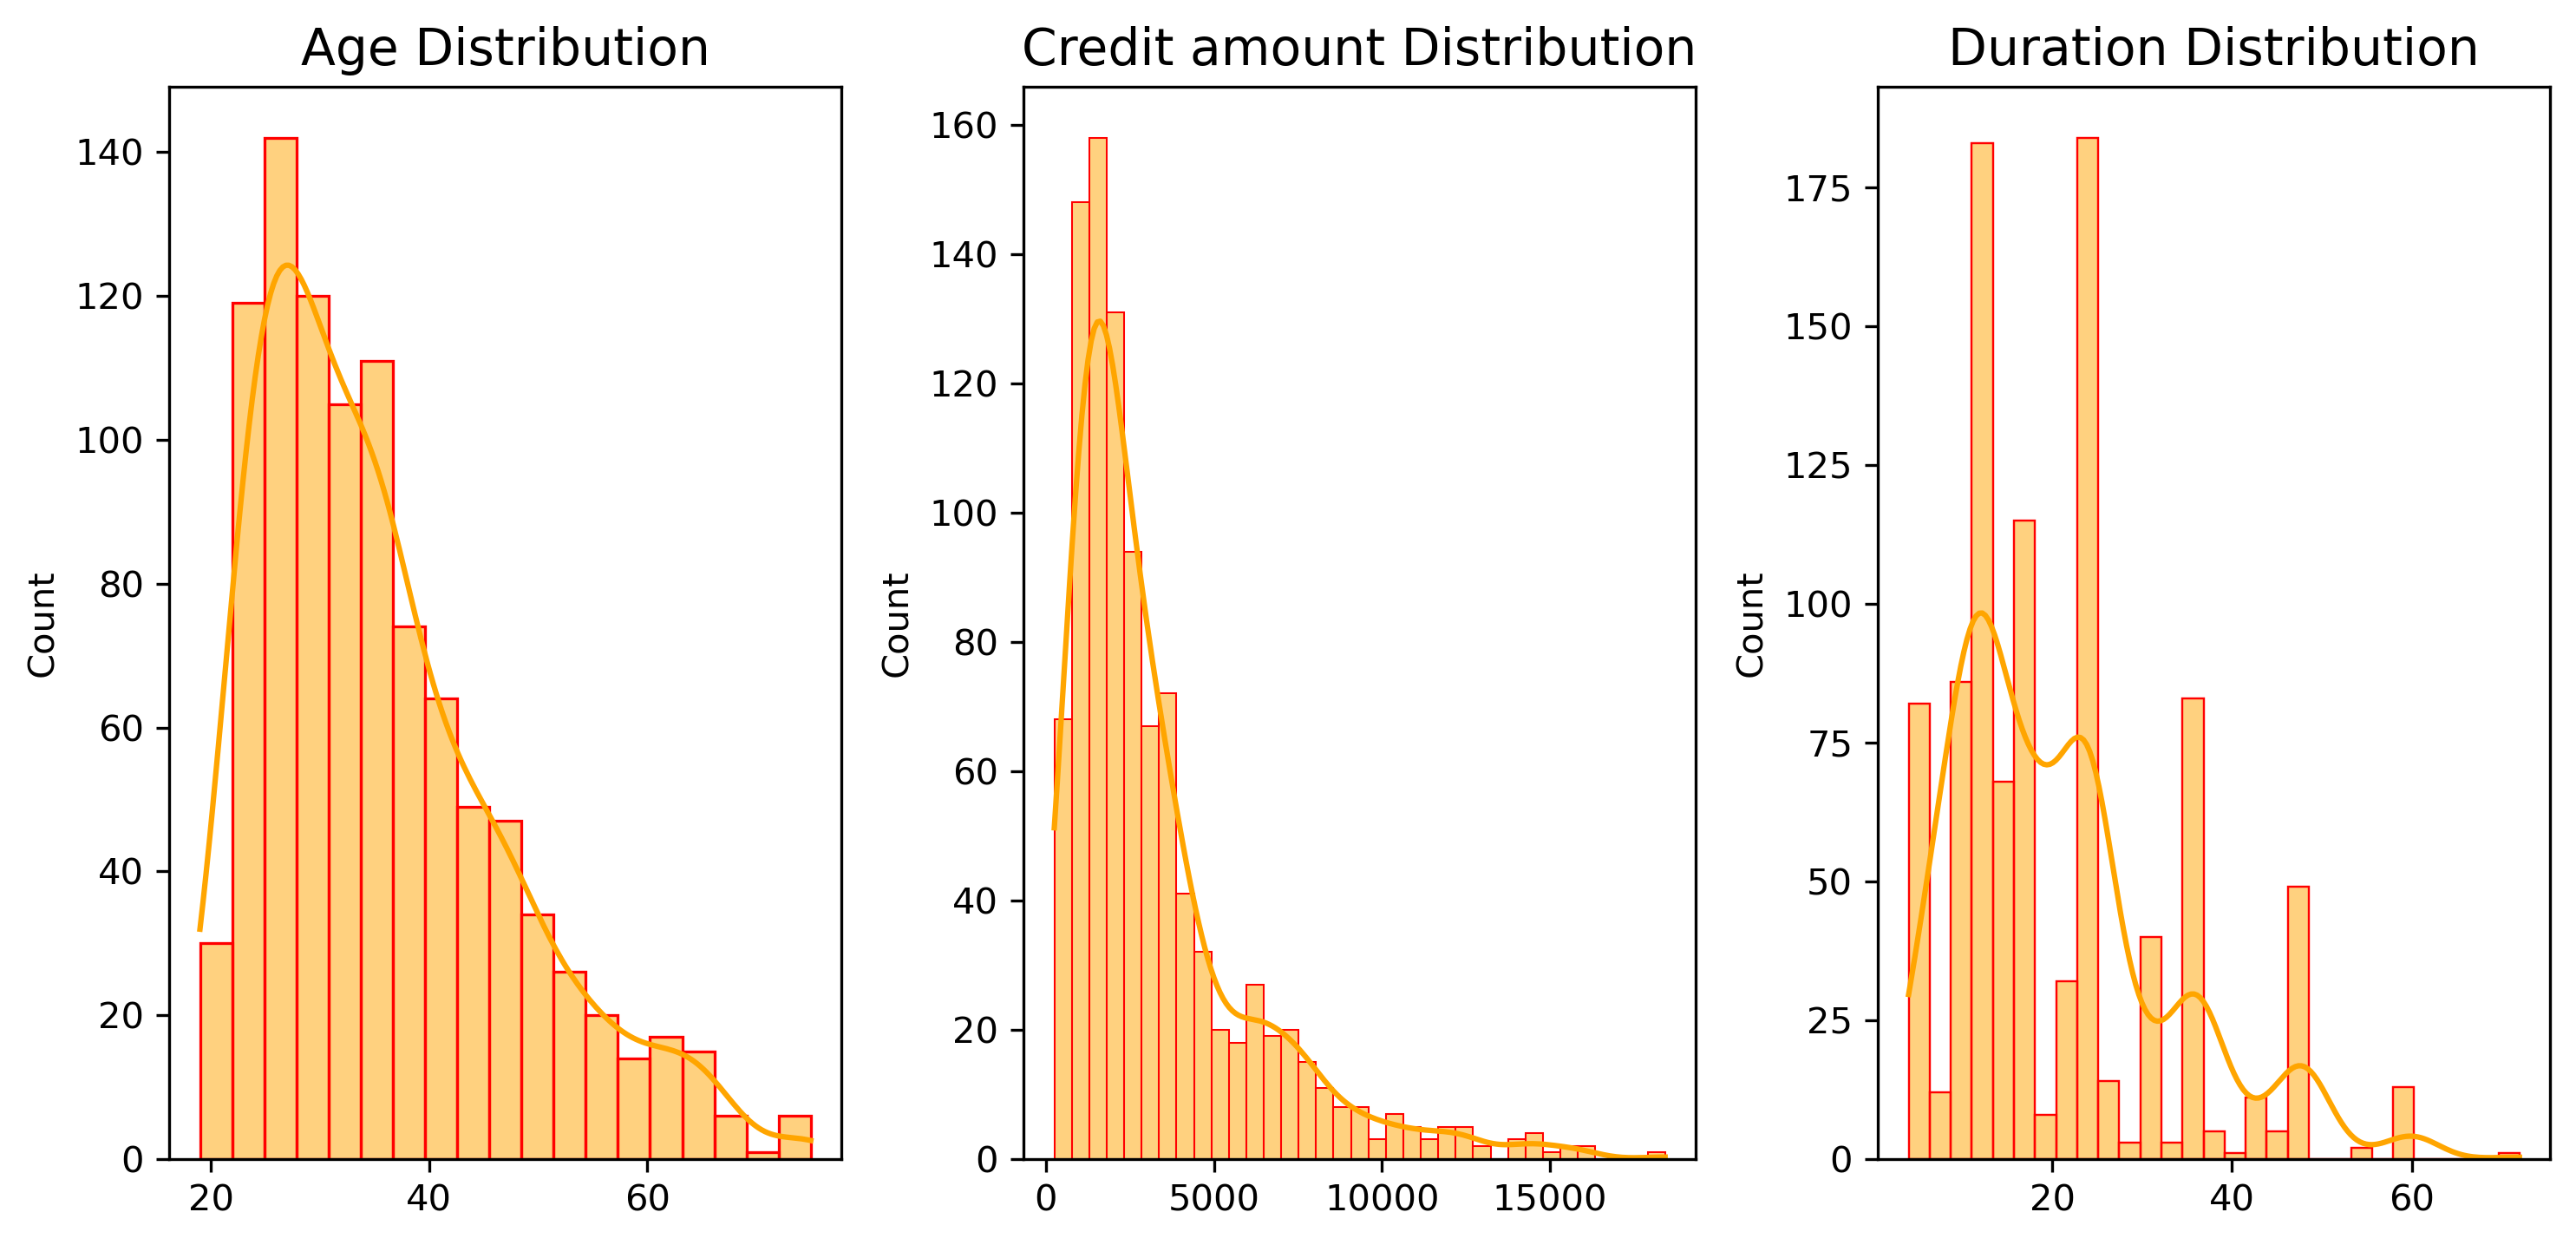

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (10, 5), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(num_features):
    sns.histplot(data=data, x=column, ax=ax[idx], color='orange', edgecolor='red', kde=True)
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

the distribution of age and credit has the long tail in right. This can be simply explained by the fact that the young will have a higher tendency to make a loan than the elder. It is because the older people will be able to save more for their living and also the young will have higher trend in investing and also buying or owning something.

In addition, majority of people will not make a loan for several tens thousands of dollars.

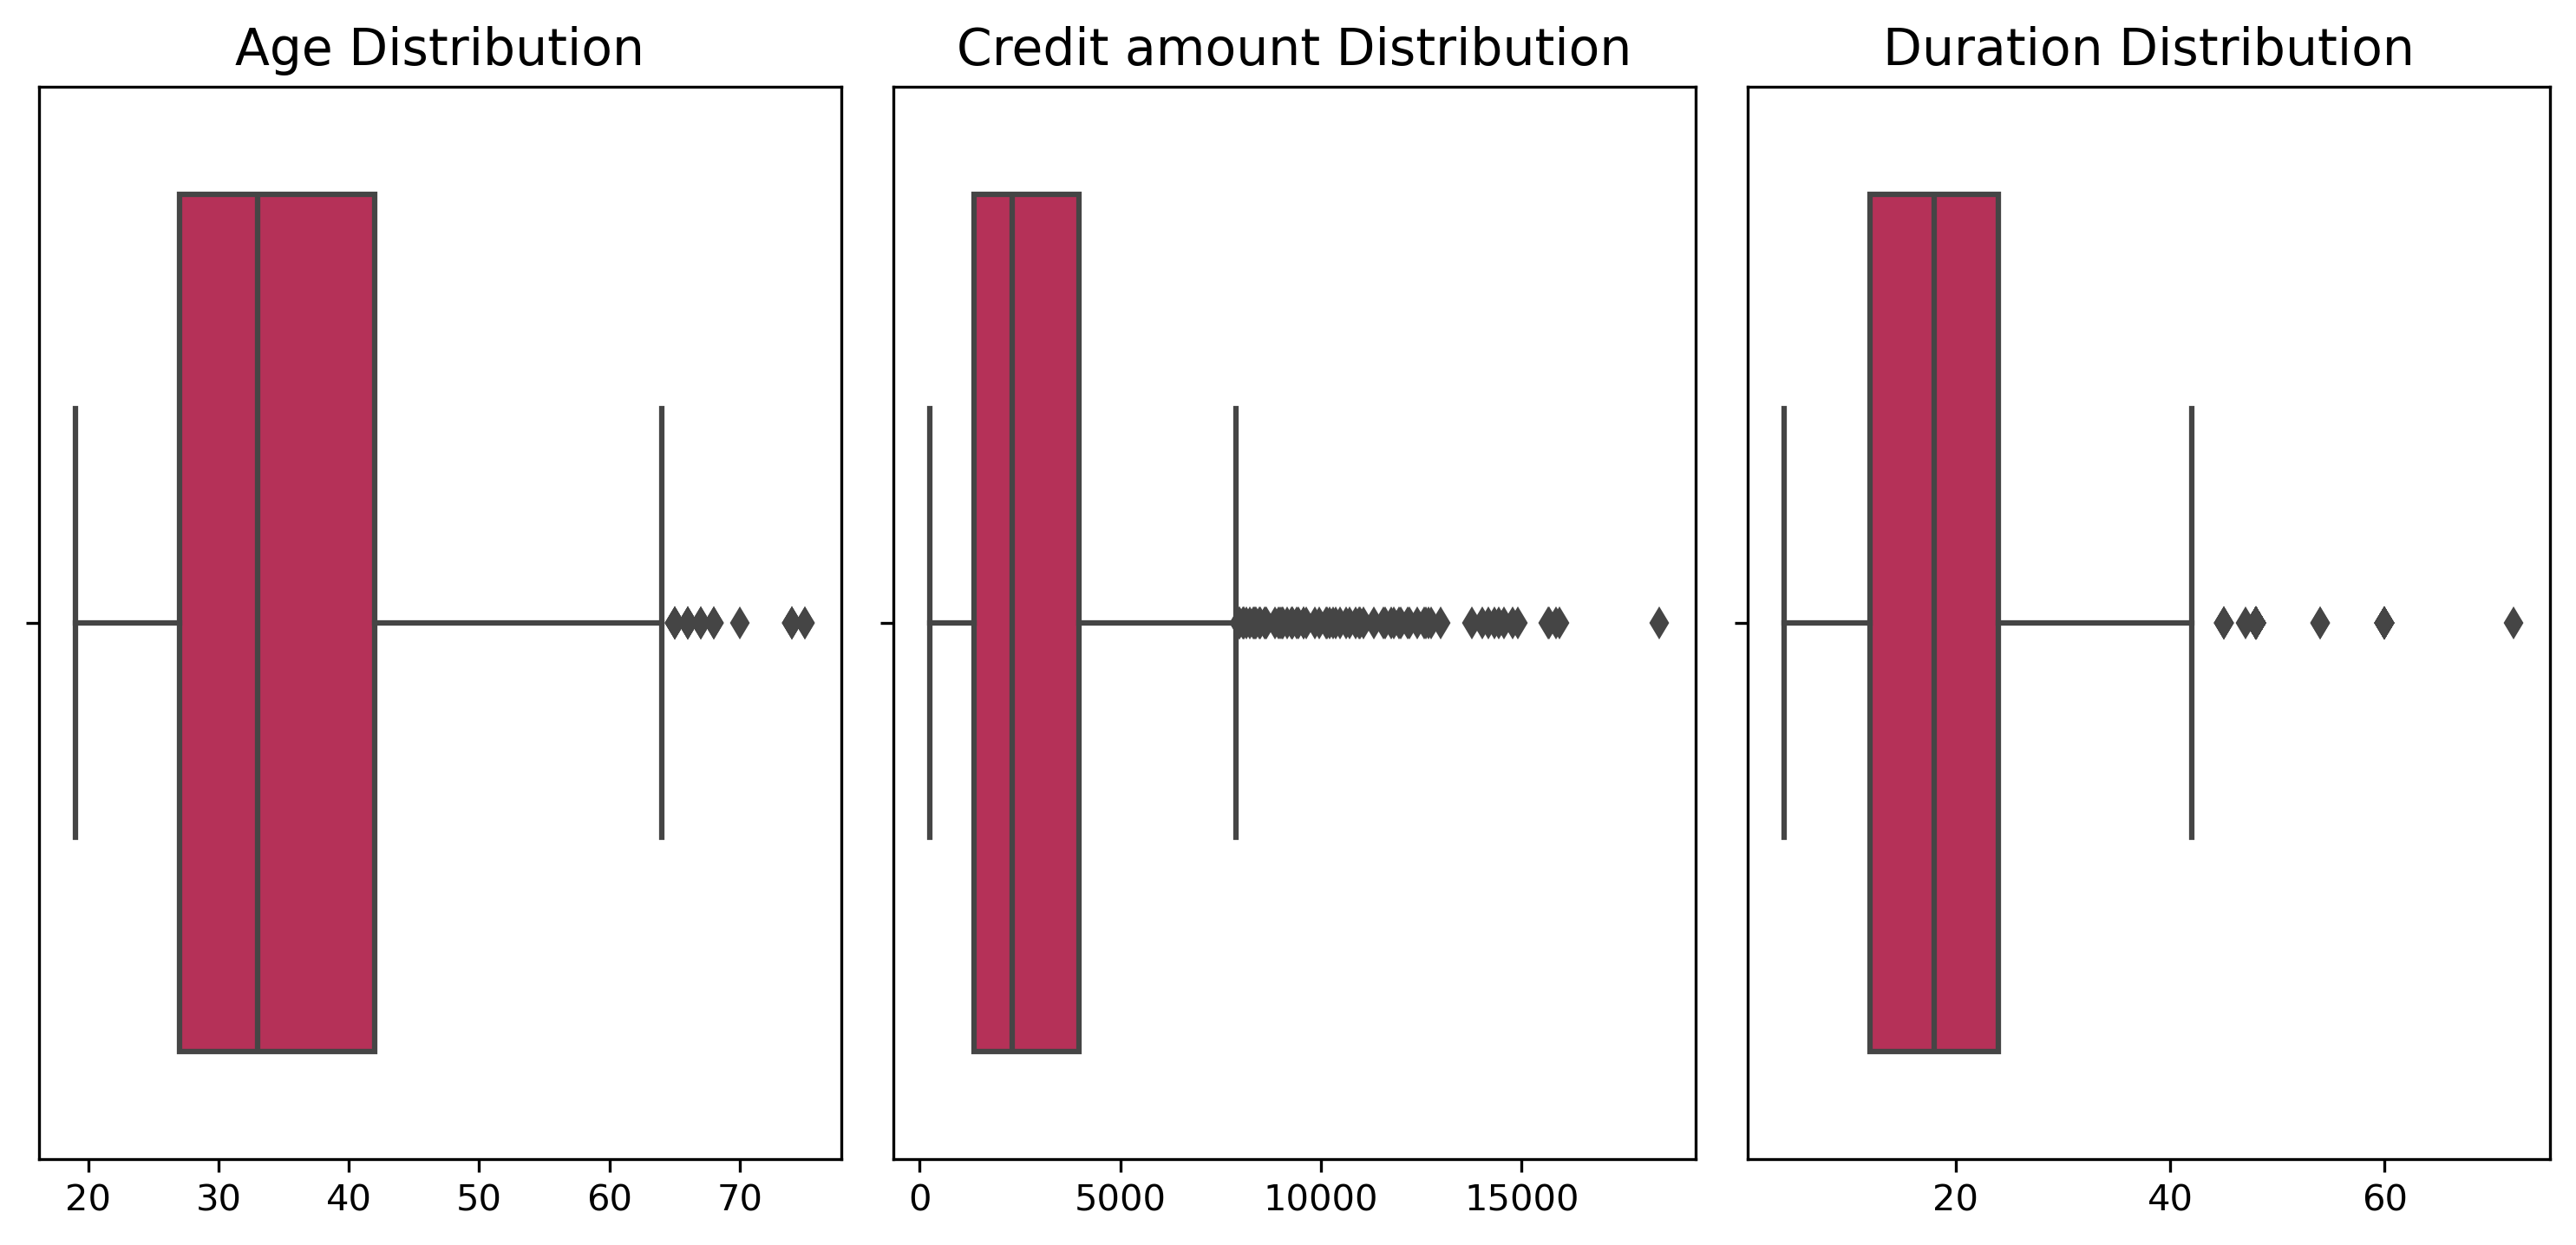

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (10, 5), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(num_features):
    sns.boxplot(data=data, x=column, ax=ax[idx], palette= "rocket")
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

As we can see there are some outliers in the dataset. We can utilize the data standardization transformation or using WOE 

# Categorical features

In [23]:
cat_features

['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'Risk']

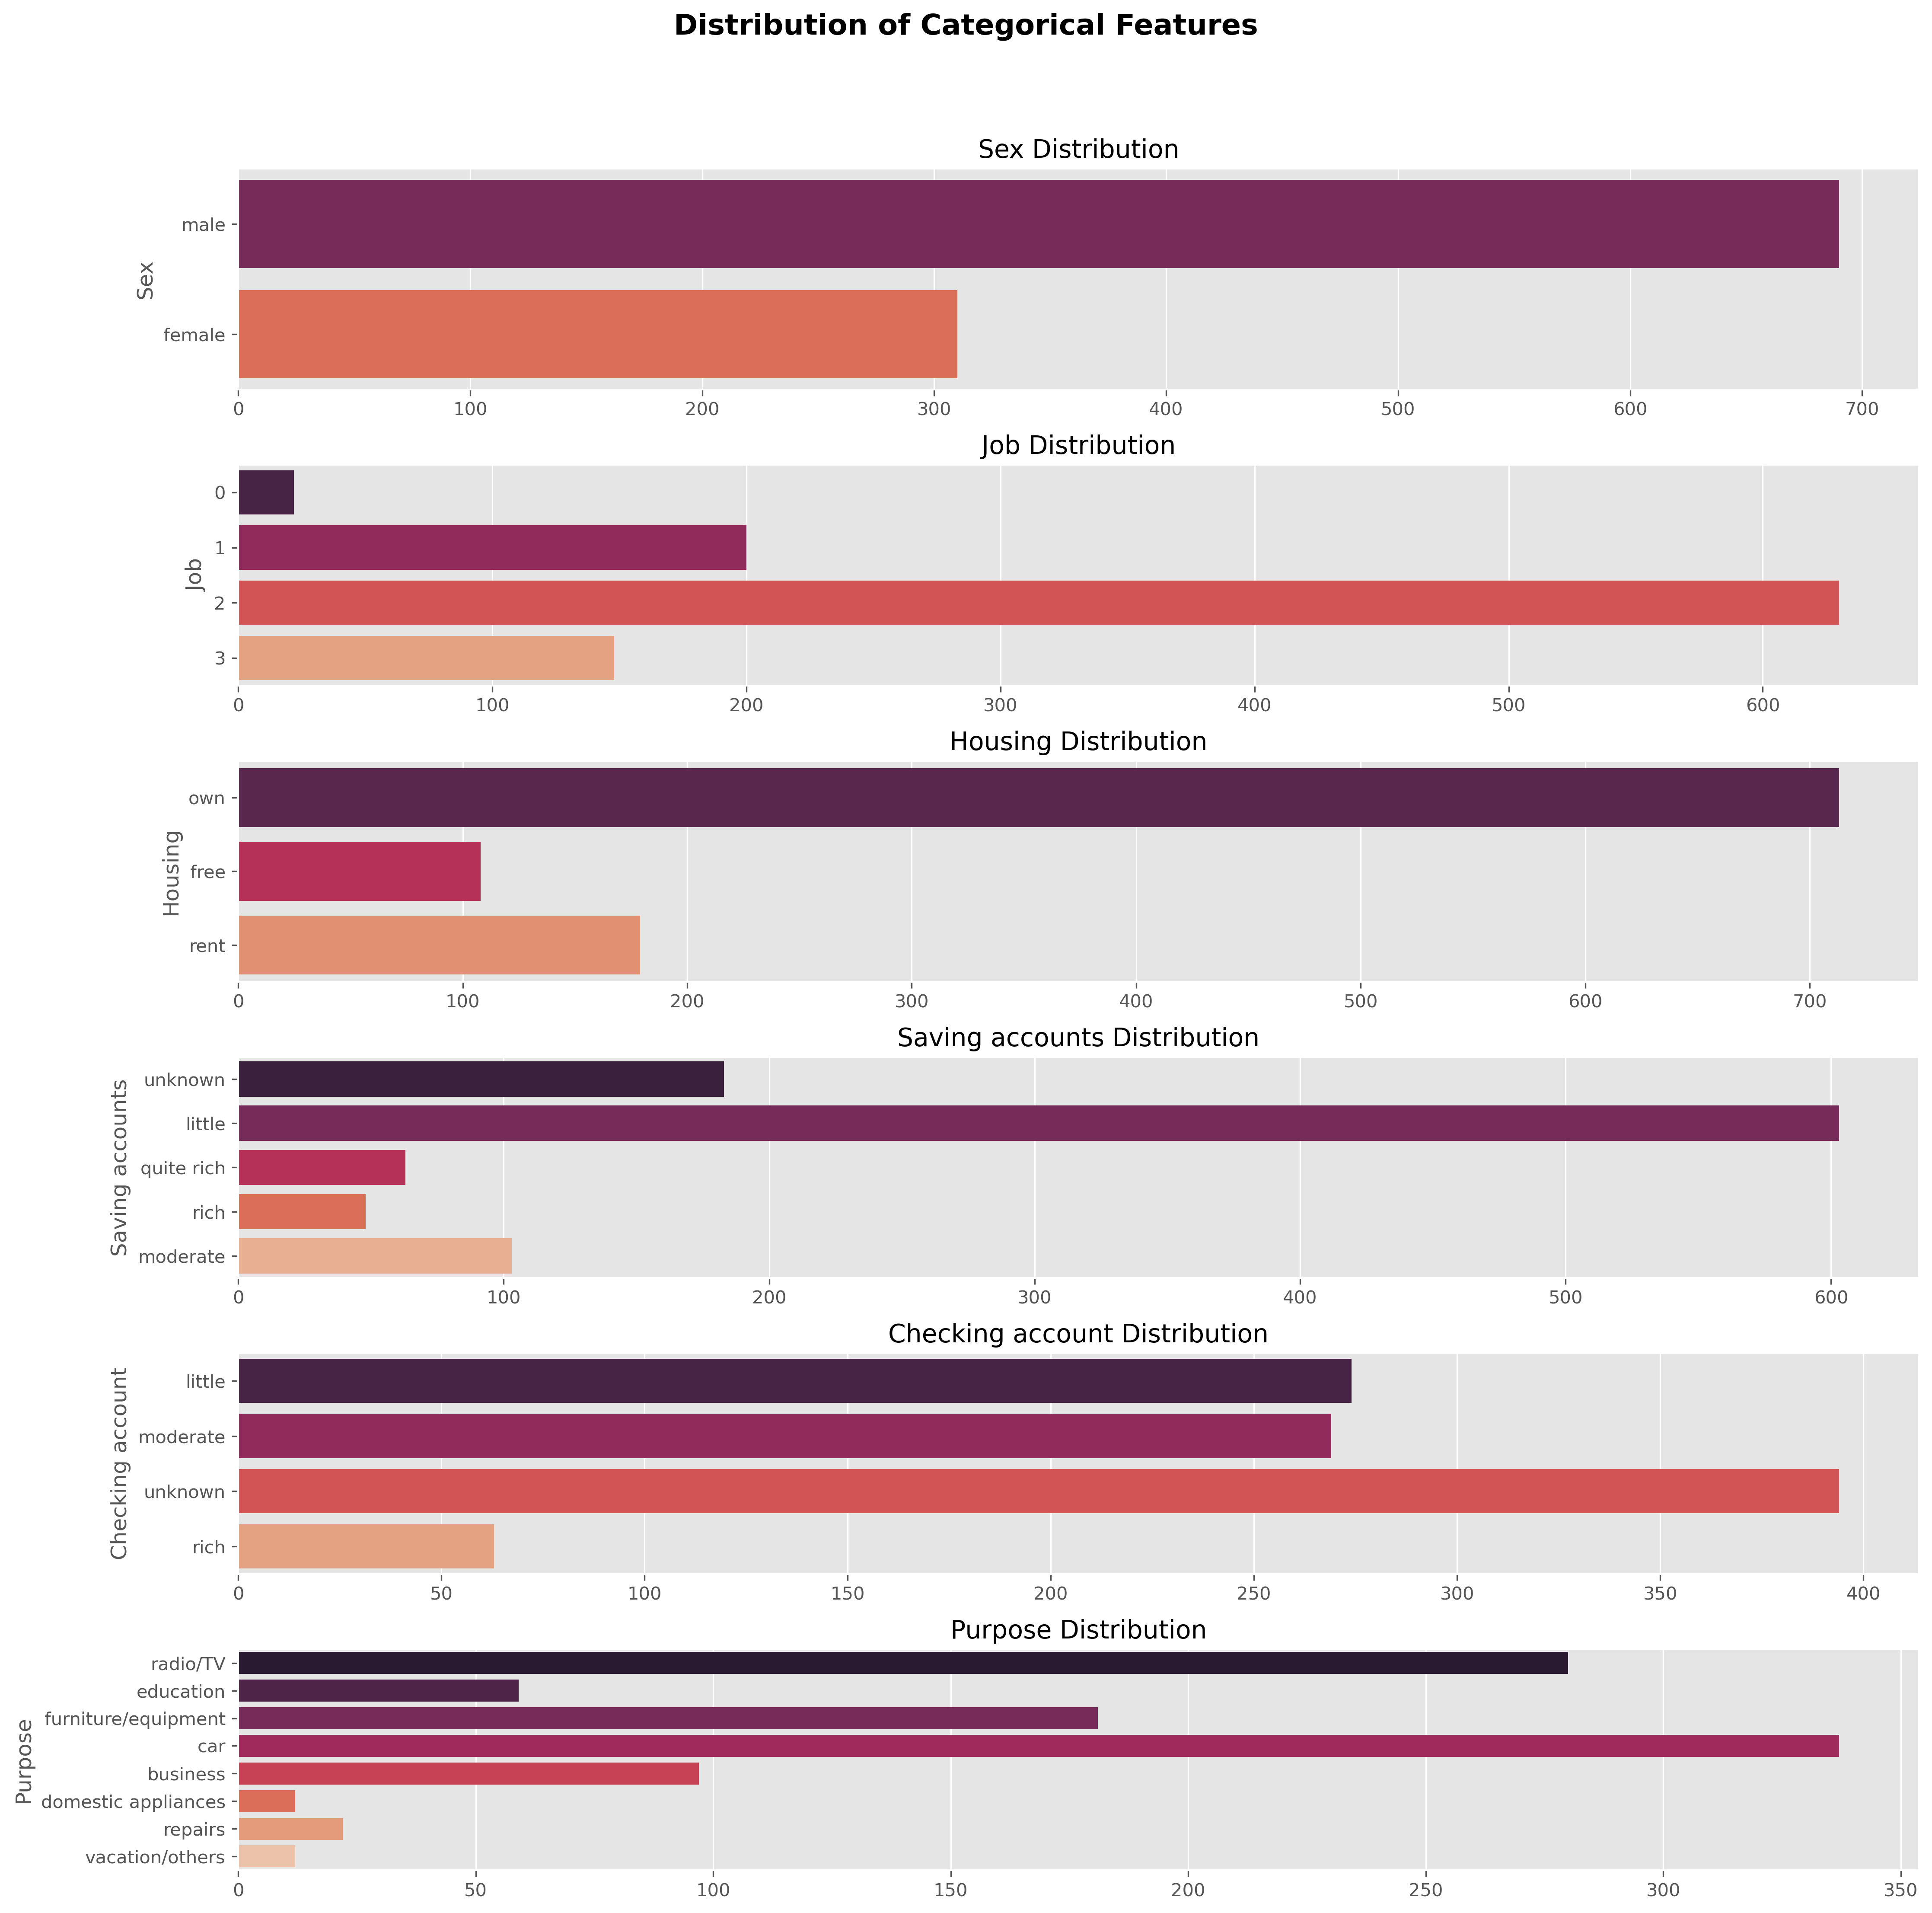

In [24]:
plt.style.use('ggplot')
fig, ax = plt.subplots(6, 1, figsize = (15, 15), dpi=300)
ax = ax.flatten()
# Exclude last value from cat features because this is our target and was already visualized above
for idx,column in enumerate(cat_features[:-1]):
    sns.countplot(data=data, y=column, ax=ax[idx], palette='rocket')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
fig.suptitle('Distribution of Categorical Features', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

It can be easily seen from the graph that man is dominant in making loans in comparision with female

What is very surprising, however, is what the loan is used for. Cars and radio/TV are in first and second place. Of course a car is expensive, but do you always have to have the best and most expensive? Exactly the same with radio and TV. Do you have to have the biggest TV or will a smaller one do? Important things like education have a rather small share in the whole thing.

Majority of people who make loan will have house. This can be the guarantee for them to show the bank that they can have something in case of not successfully pay the loan

As I have mentioned, the percentage of young people making a loan is higher since they are less likely to save as much as the elder. Therefore, we can the saving and checking accounts have the dominance in "little" value

People who have a profession that qualifies them as skilled are significantly more likely to take out a loan. This can probably be explained by the fact that jobs with little skill are very poorly paid. These people cannot afford a loan in the first place. It also makes sense to me that people with highly skilled jobs do not need a loan. Such people could be top managers, for example. They already earn a lot of money and therefore don't need a loan.

# Bivariate 

Pairplot

c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

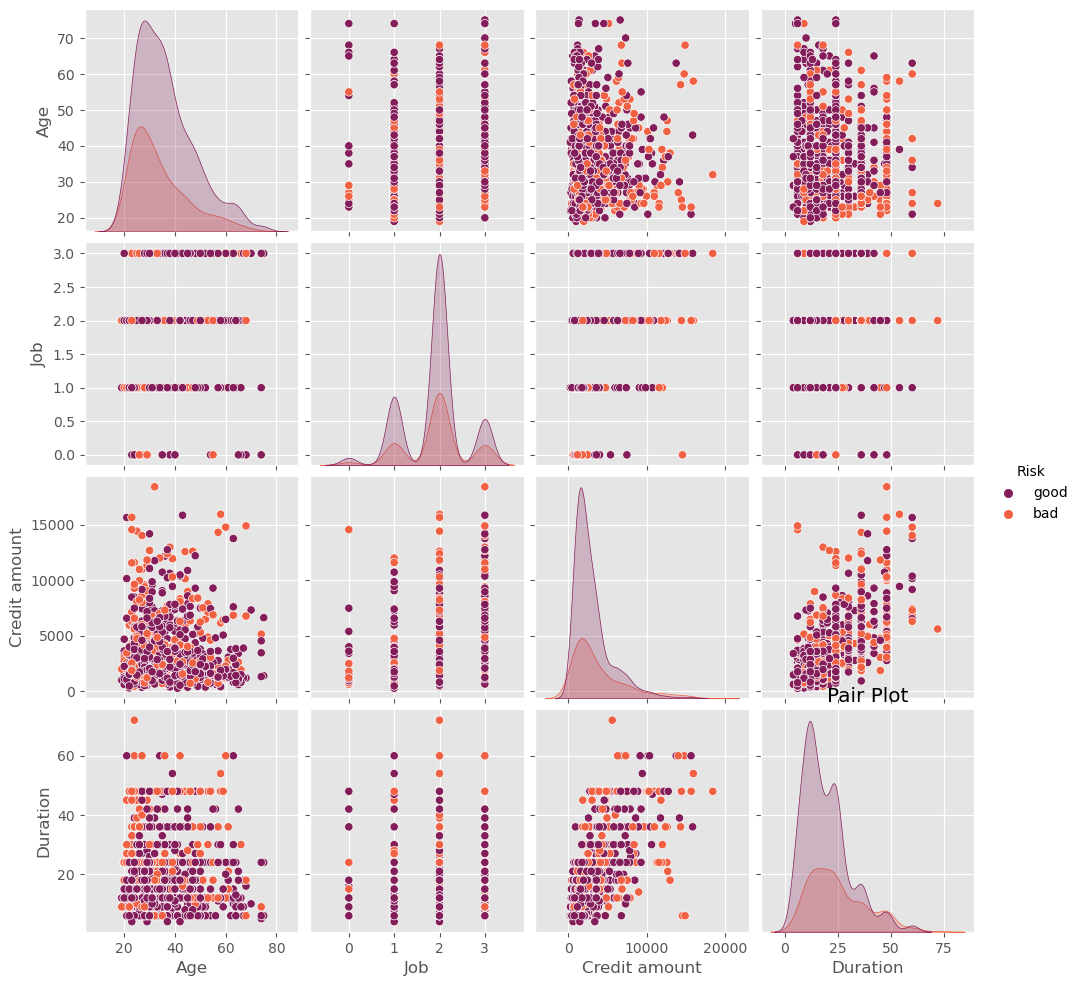

In [25]:
plt.style.use('ggplot')
sns.pairplot(data, hue='Risk', palette='rocket')
plt.title('Pair Plot')
plt.show()

We can see the more money people make loans , the higher risk it will get

This is the same with the duration

c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


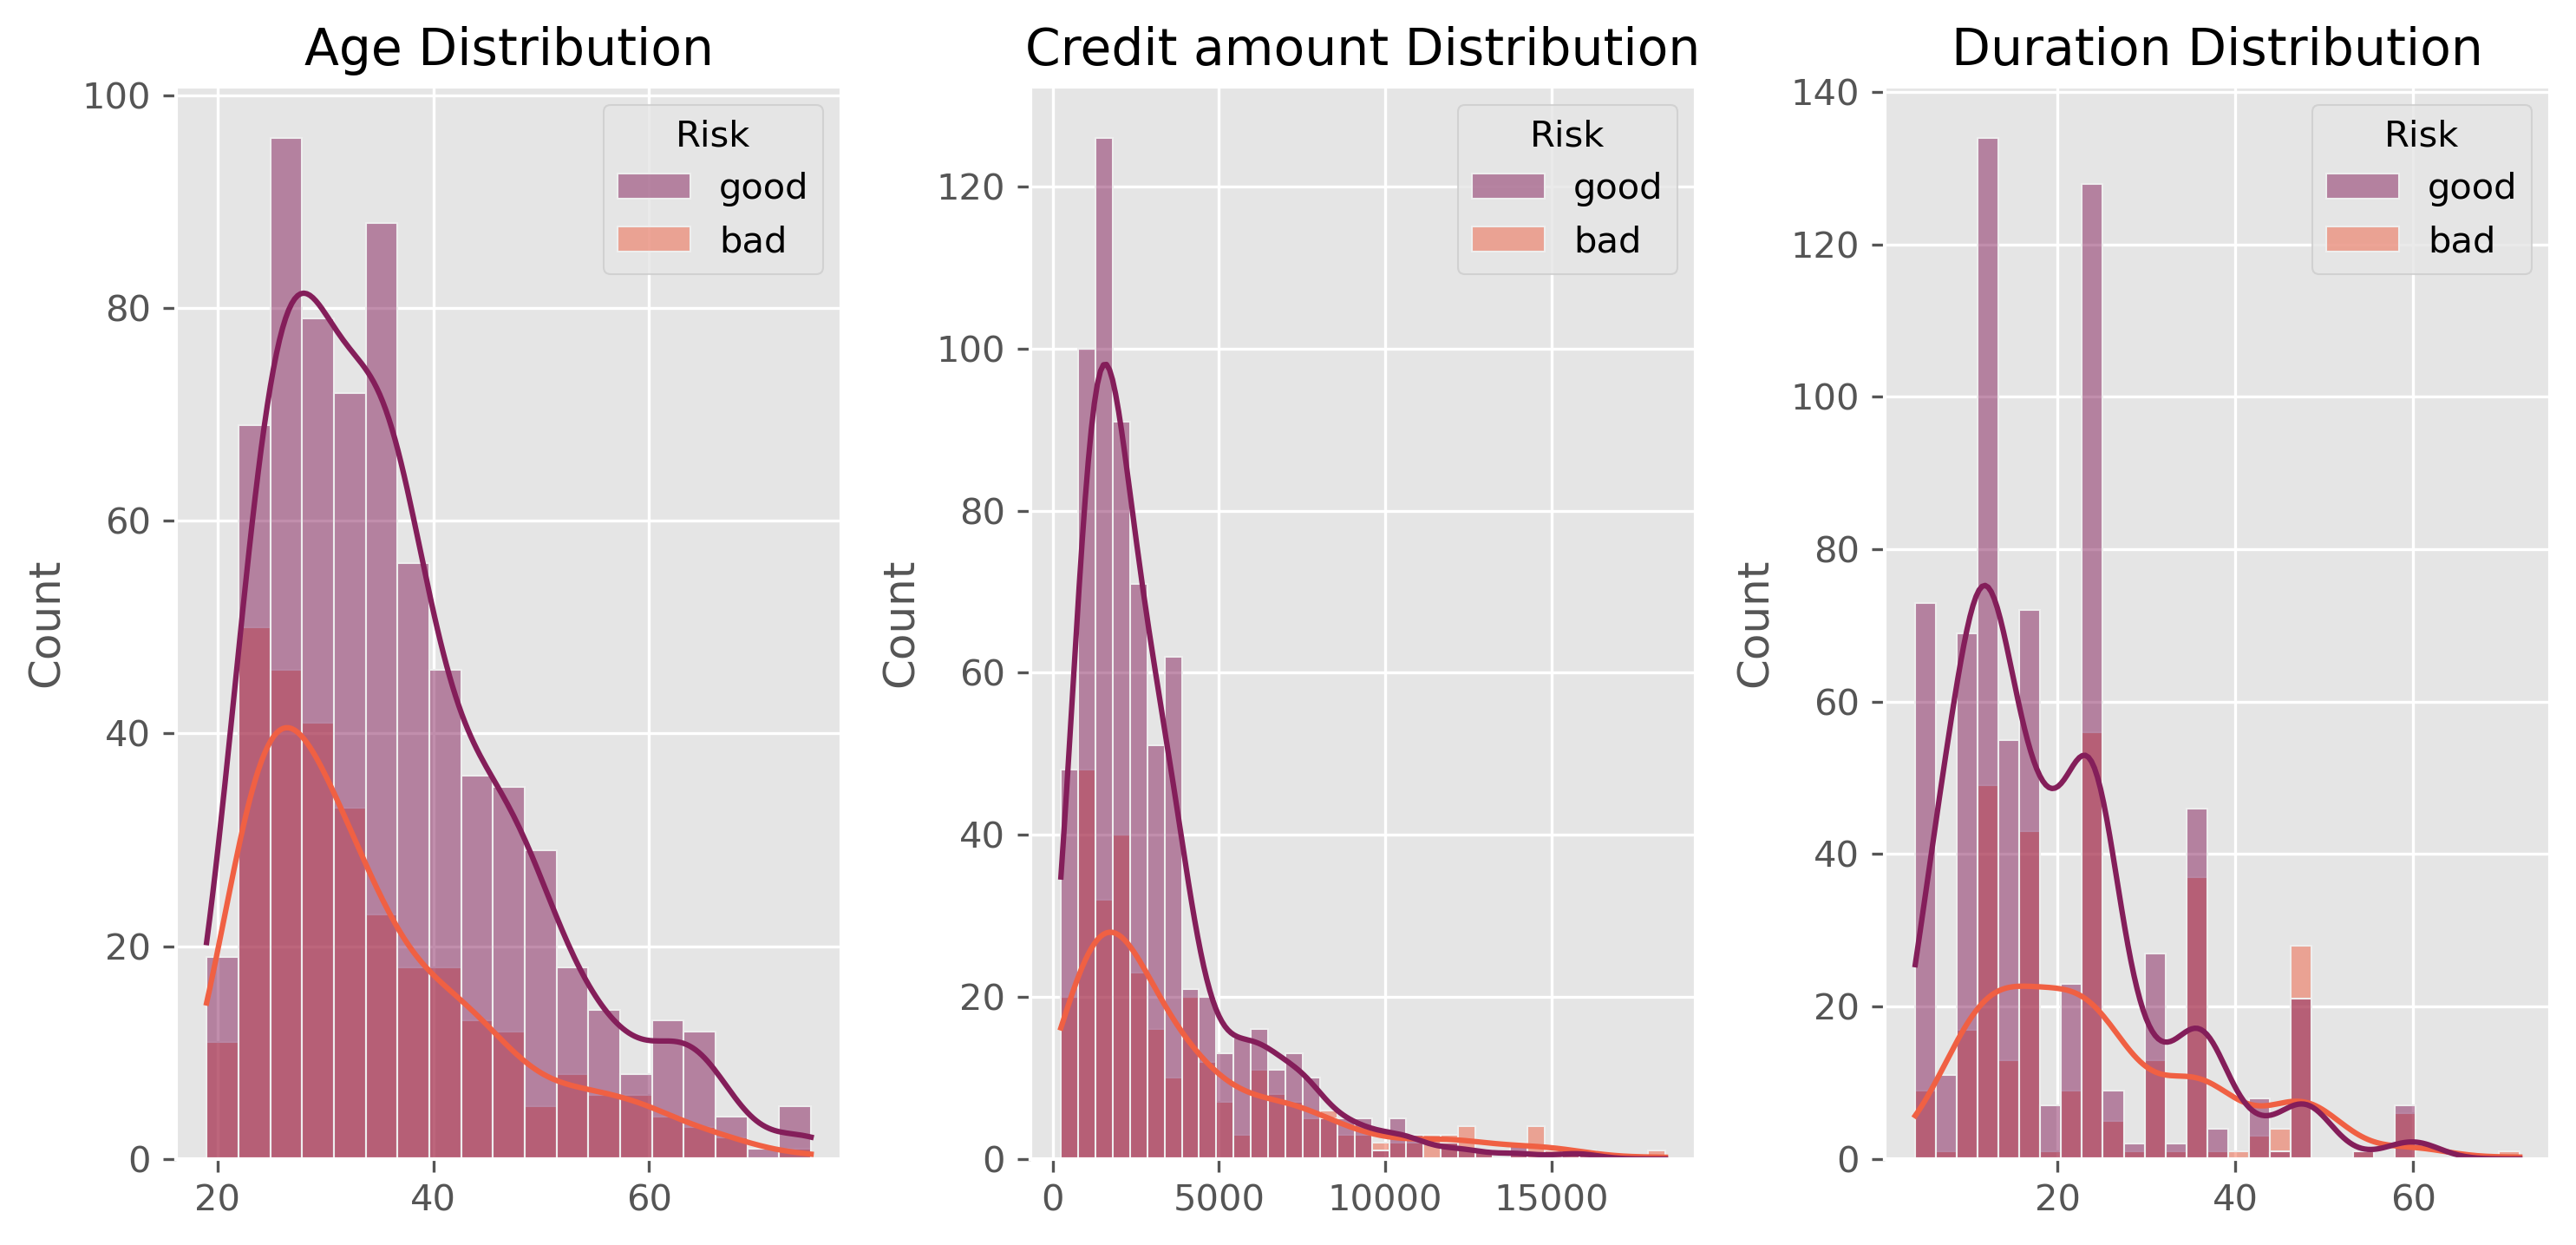

In [26]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 3,figsize = (10, 5), dpi=300)
ax = ax.flatten()
for idx,column in enumerate(num_features):
    sns.histplot(data=data, x=column, ax=ax[idx], palette='rocket', kde=True, hue='Risk')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

From this plot, we can see some intersting insights:

***The younger the more risk

Sounds valid, older people have more financial stability than youn people

If you have more money, you can probably pay back the loan sooner

***The higher the loan, the higher the risk

As I have mentioned

***The longer the loan term, the higher the risk

The longer the term of the loan, the more fees would have to be paid

The amount that has to be repaid increases accordingly

Categorical feature distribution by Risk

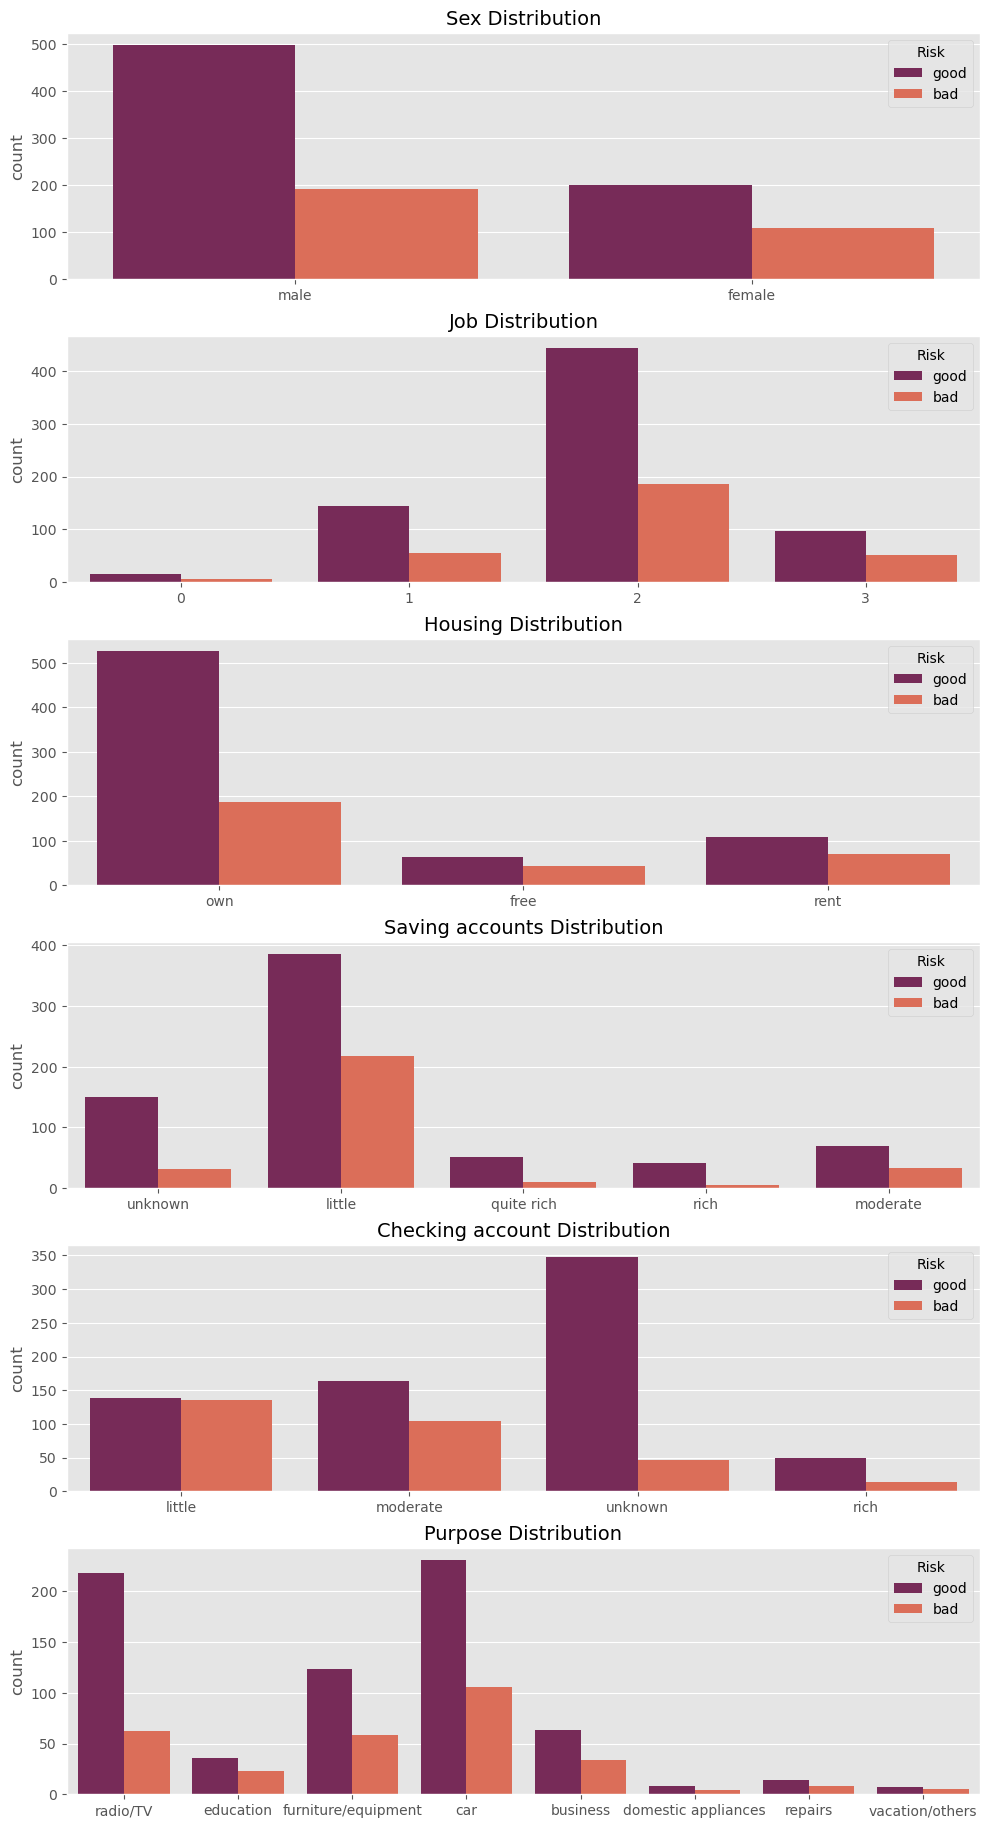

In [27]:
plt.style.use('ggplot')
fig, ax = plt.subplots(6, 1,figsize = (10, 20))
ax = ax.flatten()
for idx,column in enumerate(cat_features[:-1]):
    sns.countplot(data=data, x=column, ax=ax[idx], palette='rocket', hue='Risk')
    ax[idx].set_title(f'{column} Distribution', size = 14)
    ax[idx].set_xlabel(None)
    plt.tight_layout()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Credit amount and duration

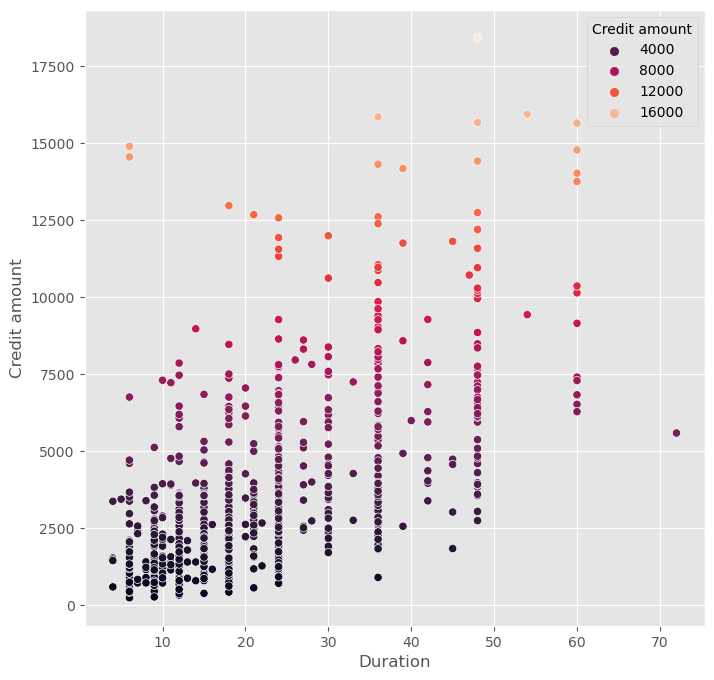

In [28]:
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')

sns.scatterplot(
    y='Credit amount', 
    x='Duration', 
    data=data, 
    hue='Credit amount', 
    palette='rocket', 
    marker='o'
)

plt.show()

The higher the loan, the longer the duration

Quite normal, it's a few hundred dollars can be repaid faster than a few thousand

c:\Users\PC\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


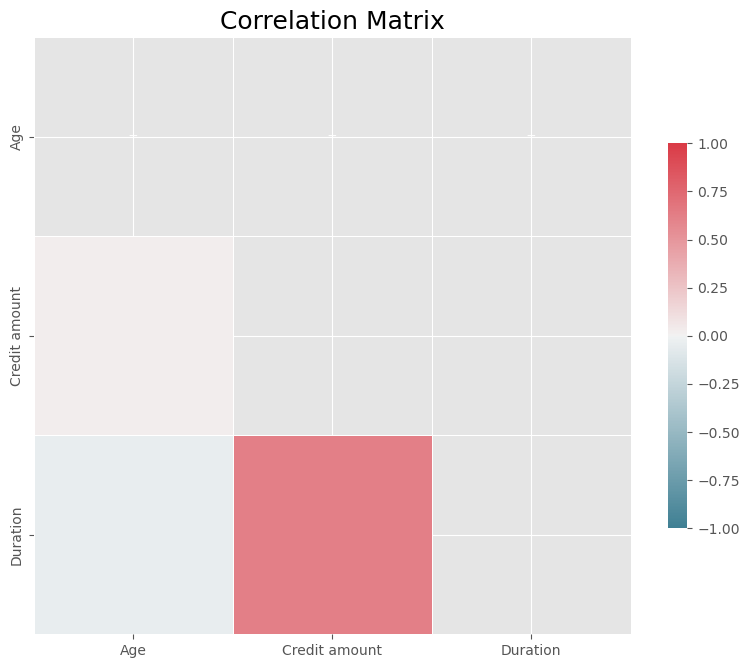

In [29]:
corr = data[num_features].corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.tight_layout()

# Preprocessing

In [30]:
#Replace good/bad with 0/1
data['Risk'] = data['Risk'].replace({'bad': 0, 'good': 1})

In [31]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,unknown,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


In [32]:
data.columns = data.columns.str.replace(' ', '_')

In [33]:
data

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,unknown,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,unknown,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,unknown,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,unknown,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


Standardization

In [34]:
from sklearn.preprocessing import StandardScaler
to_scale_columns = ["Age", "Credit_amount", "Duration"]
scaler = StandardScaler()
data[to_scale_columns] = scaler.fit_transform(data[to_scale_columns])

In [35]:
data

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,2.766456,male,2,own,unknown,little,-0.745131,-1.236478,radio/TV,1
1,-1.191404,female,2,own,little,moderate,0.949817,2.248194,radio/TV,0
2,1.183312,male,1,own,little,unknown,-0.416562,-0.738668,education,1
3,0.831502,male,2,free,little,little,1.634247,1.750384,furniture/equipment,1
4,1.535122,male,2,free,little,little,0.566664,0.256953,car,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,female,1,own,little,unknown,-0.544162,-0.738668,furniture/equipment,1
996,0.391740,male,3,own,little,little,0.207612,0.754763,car,1
997,0.215835,male,2,own,little,unknown,-0.874503,-0.738668,radio/TV,1
998,-1.103451,male,2,free,little,little,-0.505528,1.999289,radio/TV,0


WOE for numerical

In [36]:
def calculate_woe_iv_num(df, col, target_col, bins=None):
    if bins is None:
        # Automatically determine bins using pandas cut
        df[col + '_bins'], bins = pd.cut(df[col], bins=10, retbins=True, labels=False, include_lowest=True)
    else:
        # Use provided bins to bin the numerical column
        df[col + '_bins'] = pd.cut(df[col], bins=bins, labels=False, include_lowest=True)
    
    # Calculate counts for each bin
    category_counts = df[col + '_bins'].value_counts()
    category_counts_pos = df[df[target_col] == 1][col + '_bins'].value_counts()
    category_counts_neg = df[df[target_col] == 0][col + '_bins'].value_counts()
    
    woe_values = {}
    iv_values = {}
    
    for category in category_counts.index:
        pos_count = category_counts_pos.get(category, 0)
        neg_count = category_counts_neg.get(category, 0)
        total_count = category_counts[category]
        
        # Calculate WOE
        if neg_count > 0 and pos_count > 0:
            woe = np.log((pos_count / df[target_col].sum()) / (neg_count / (df[target_col].count() - df[target_col].sum())))
        else:
            woe = 0
        
        woe_values[category] = woe
        
        # Calculate IV
        if neg_count > 0 and pos_count > 0:
            pos_rate = pos_count / df[target_col].sum()
            neg_rate = neg_count / (df[target_col].count() - df[target_col].sum())
            iv = (pos_rate - neg_rate) * woe
        else:
            iv = 0
            
        iv_values[category] = iv
    
    # Map WOE and IV values back to original numerical column
    df[col + '_woe'] = df[col + '_bins'].map(woe_values)
    df[col + '_iv'] = df[col + '_bins'].map(iv_values)
    

In [37]:
data

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,2.766456,male,2,own,unknown,little,-0.745131,-1.236478,radio/TV,1
1,-1.191404,female,2,own,little,moderate,0.949817,2.248194,radio/TV,0
2,1.183312,male,1,own,little,unknown,-0.416562,-0.738668,education,1
3,0.831502,male,2,free,little,little,1.634247,1.750384,furniture/equipment,1
4,1.535122,male,2,free,little,little,0.566664,0.256953,car,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,female,1,own,little,unknown,-0.544162,-0.738668,furniture/equipment,1
996,0.391740,male,3,own,little,little,0.207612,0.754763,car,1
997,0.215835,male,2,own,little,unknown,-0.874503,-0.738668,radio/TV,1
998,-1.103451,male,2,free,little,little,-0.505528,1.999289,radio/TV,0


In [38]:
num_features = data._get_numeric_data().columns.tolist()
cat_features = data.drop(num_features, axis=1).columns.tolist()

In [39]:
num_features.remove("Risk")
for col in num_features:
    calculate_woe_iv_num(data, col, 'Risk')

In [40]:
data

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Age_bins,Age_woe,Age_iv,Credit_amount_bins,Credit_amount_woe,Credit_amount_iv,Duration_bins,Duration_woe,Duration_iv
0,2.766456,male,2,own,unknown,little,-0.745131,-1.236478,radio/TV,1,8,0.315853,0.001955,0,0.103862,0.004699,0,0.826679,0.095659
1,-1.191404,female,2,own,little,moderate,0.949817,2.248194,radio/TV,0,0,-0.480835,0.037322,3,-0.228259,0.004348,6,-1.221991,0.091940
2,1.183312,male,1,own,little,unknown,-0.416562,-0.738668,education,1,5,0.784119,0.028004,1,0.407660,0.044454,1,0.302872,0.022499
3,0.831502,male,2,free,little,little,1.634247,1.750384,furniture/equipment,1,4,0.082238,0.000705,4,-0.419854,0.007197,5,0.028171,0.000013
4,1.535122,male,2,free,little,little,0.566664,0.256953,car,0,6,-0.259511,0.002966,2,-0.493126,0.025596,2,-0.095707,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,female,1,own,little,unknown,-0.544162,-0.738668,furniture/equipment,1,2,0.084866,0.001253,0,0.103862,0.004699,1,0.302872,0.022499
996,0.391740,male,3,own,little,little,0.207612,0.754763,car,1,3,0.422132,0.025127,1,0.407660,0.044454,3,-0.154151,0.001395
997,0.215835,male,2,own,little,unknown,-0.874503,-0.738668,radio/TV,1,3,0.422132,0.025127,0,0.103862,0.004699,1,0.302872,0.022499
998,-1.103451,male,2,free,little,little,-0.505528,1.999289,radio/TV,0,0,-0.480835,0.037322,0,0.103862,0.004699,6,-1.221991,0.091940


In [41]:
data.drop(columns= num_features, axis =1, inplace= True)
data.drop(columns=["Age_bins","Credit_amount_bins","Duration_bins"], axis=1, inplace = True)

In [42]:
data

,Sex,Job,Housing,Saving_accounts,Checking_account,Purpose,Risk,Age_woe,Age_iv,Credit_amount_woe,Credit_amount_iv,Duration_woe,Duration_iv
0,male,2,own,unknown,little,radio/TV,1,0.315853,0.001955,0.103862,0.004699,0.826679,0.095659
1,female,2,own,little,moderate,radio/TV,0,-0.480835,0.037322,-0.228259,0.004348,-1.221991,0.091940
2,male,1,own,little,unknown,education,1,0.784119,0.028004,0.407660,0.044454,0.302872,0.022499
3,male,2,free,little,little,furniture/equipment,1,0.082238,0.000705,-0.419854,0.007197,0.028171,0.000013
4,male,2,free,little,little,car,0,-0.259511,0.002966,-0.493126,0.025596,-0.095707,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,1,own,little,unknown,furniture/equipment,1,0.084866,0.001253,0.103862,0.004699,0.302872,0.022499
996,male,3,own,little,little,car,1,0.422132,0.025127,0.407660,0.044454,-0.154151,0.001395
997,male,2,own,little,unknown,radio/TV,1,0.422132,0.025127,0.103862,0.004699,0.302872,0.022499
998,male,2,free,little,little,radio/TV,0,-0.480835,0.037322,0.103862,0.004699,-1.221991,0.091940


We will make a dataset replace the nan with the most frequent value

In [43]:
data_most_freq = data.copy()

In [44]:
data_most_freq["Saving_accounts"] = data_most_freq["Saving_accounts"].str.replace("unknown", "little")
data_most_freq["Checking_account"] = data_most_freq["Checking_account"].str.replace("unknown", "little")

In [45]:
data_unk = data.copy()

WOE for categorical unknown

In [46]:
# Calculate WOE for each category including 'Missing'
def calculate_woe_iv_cat(df, col, target_col):
    category_counts = df[col].value_counts()
    category_counts_pos = df[df[target_col] == 1][col].value_counts()
    category_counts_neg = df[df[target_col] == 0][col].value_counts()
    
    woe_values = {}
    iv_values = {}
    
    for category in category_counts.index:
        pos_count = category_counts_pos.get(category, 0)
        neg_count = category_counts_neg.get(category, 0)
        total_count = category_counts[category]
        
        woe = np.log((pos_count / total_count) / (neg_count / total_count))
        woe_values[category] = woe
        
        # Calculate Information Value (IV)
        if neg_count > 0 and pos_count > 0:
            iv = (pos_count / df[target_col].sum() - neg_count / (df[target_col].count() - df[target_col].sum())) * woe
        else:
            iv = 0
            
        iv_values[category] = iv
    
    return woe_values, iv_values


In [47]:
num_features = data_unk._get_numeric_data().columns.tolist()
cat_features = data_unk.drop(num_features, axis=1).columns.tolist()

In [48]:
woe_mappings_unk = {}
iv_mappings_unk = {}

# Apply WOE transformation for each categorical column
for col in cat_features:
    woe_values, iv_values = calculate_woe_iv_cat(data_unk, col, 'Risk')
    woe_mappings_unk[col] = woe_values
    iv_mappings_unk[col] = iv_values
    data_unk[col + '_WOE'] = data_unk[col].map(woe_values)
    data_unk[col + "_IV"] = data_unk[col].map(iv_values)


In [49]:
data_unk.drop(columns = cat_features,axis = 1, inplace = True)

In [50]:
data_unk

,Risk,Age_woe,Age_iv,Credit_amount_woe,Credit_amount_iv,Duration_woe,Duration_iv,Sex_WOE,Sex_IV,Job_WOE,Job_IV,Housing_WOE,Housing_IV,Saving_accounts_WOE,Saving_accounts_IV,Checking_account_WOE,Checking_account_IV,Purpose_WOE,Purpose_IV
0,1,0.315853,0.001955,0.103862,0.004699,0.826679,0.095659,0.960333,0.073168,0.870078,0.012430,1.041454,0.138365,1.551544,0.169192,0.029199,-0.007342,1.257361,0.131723
1,0,-0.480835,0.037322,-0.228259,0.004348,-1.221991,0.091940,0.611957,-0.046625,0.870078,0.012430,1.041454,0.138365,0.575940,-0.099007,0.445906,-0.051598,1.257361,0.131723
2,1,0.784119,0.028004,0.407660,0.044454,0.302872,0.022499,0.960333,0.073168,0.944462,0.017990,1.041454,0.138365,0.575940,-0.099007,2.023561,0.695720,0.448025,-0.011307
3,1,0.082238,0.000705,-0.419854,0.007197,0.028171,0.000013,0.960333,0.073168,0.870078,0.012430,0.374693,-0.020697,0.575940,-0.099007,0.029199,-0.007342,0.751741,-0.013245
4,0,-0.259511,0.002966,-0.493126,0.025596,-0.095707,0.003145,0.960333,0.073168,0.870078,0.012430,0.374693,-0.020697,0.575940,-0.099007,0.029199,-0.007342,0.778979,-0.018176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.084866,0.001253,0.103862,0.004699,0.302872,0.022499,0.611957,-0.046625,0.944462,0.017990,1.041454,0.138365,0.575940,-0.099007,2.023561,0.695720,0.751741,-0.013245
996,1,0.422132,0.025127,0.407660,0.044454,-0.154151,0.001395,0.960333,0.073168,0.642885,-0.020205,1.041454,0.138365,0.575940,-0.099007,0.029199,-0.007342,0.778979,-0.018176
997,1,0.422132,0.025127,0.103862,0.004699,0.302872,0.022499,0.960333,0.073168,0.870078,0.012430,1.041454,0.138365,0.575940,-0.099007,2.023561,0.695720,1.257361,0.131723
998,0,-0.480835,0.037322,0.103862,0.004699,-1.221991,0.091940,0.960333,0.073168,0.870078,0.012430,0.374693,-0.020697,0.575940,-0.099007,0.029199,-0.007342,1.257361,0.131723


In [51]:
data_most_freq

,Sex,Job,Housing,Saving_accounts,Checking_account,Purpose,Risk,Age_woe,Age_iv,Credit_amount_woe,Credit_amount_iv,Duration_woe,Duration_iv
0,male,2,own,little,little,radio/TV,1,0.315853,0.001955,0.103862,0.004699,0.826679,0.095659
1,female,2,own,little,moderate,radio/TV,0,-0.480835,0.037322,-0.228259,0.004348,-1.221991,0.091940
2,male,1,own,little,little,education,1,0.784119,0.028004,0.407660,0.044454,0.302872,0.022499
3,male,2,free,little,little,furniture/equipment,1,0.082238,0.000705,-0.419854,0.007197,0.028171,0.000013
4,male,2,free,little,little,car,0,-0.259511,0.002966,-0.493126,0.025596,-0.095707,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,1,own,little,little,furniture/equipment,1,0.084866,0.001253,0.103862,0.004699,0.302872,0.022499
996,male,3,own,little,little,car,1,0.422132,0.025127,0.407660,0.044454,-0.154151,0.001395
997,male,2,own,little,little,radio/TV,1,0.422132,0.025127,0.103862,0.004699,0.302872,0.022499
998,male,2,free,little,little,radio/TV,0,-0.480835,0.037322,0.103862,0.004699,-1.221991,0.091940


In [52]:
num_features = data_most_freq._get_numeric_data().columns.tolist()
cat_features = data_most_freq.drop(num_features, axis=1).columns.tolist()

In [53]:
woe_mappings_freq = {}
iv_mappings_freq = {}

# Apply WOE transformation for each categorical column
for col in cat_features:
    woe_values, iv_values = calculate_woe_iv_cat(data_most_freq, col, 'Risk')
    woe_mappings_freq[col] = woe_values
    iv_mappings_freq[col] = iv_values
    data_most_freq[col + '_WOE'] = data_most_freq[col].map(woe_values)
    data_most_freq[col + "_IV"] = data_most_freq[col].map(iv_values)


In [54]:
data_most_freq

,Sex,Job,Housing,Saving_accounts,Checking_account,Purpose,Risk,Age_woe,Age_iv,Credit_amount_woe,...,Job_WOE,Job_IV,Housing_WOE,Housing_IV,Saving_accounts_WOE,Saving_accounts_IV,Checking_account_WOE,Checking_account_IV,Purpose_WOE,Purpose_IV
0,male,2,own,little,little,radio/TV,1,0.315853,0.001955,0.103862,...,0.870078,0.012430,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,1.257361,0.131723
1,female,2,own,little,moderate,radio/TV,0,-0.480835,0.037322,-0.228259,...,0.870078,0.012430,1.041454,0.138365,0.768545,-0.048309,0.445906,-0.051598,1.257361,0.131723
2,male,1,own,little,little,education,1,0.784119,0.028004,0.407660,...,0.944462,0.017990,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,0.448025,-0.011307
3,male,2,free,little,little,furniture/equipment,1,0.082238,0.000705,-0.419854,...,0.870078,0.012430,0.374693,-0.020697,0.768545,-0.048309,0.989767,0.091436,0.751741,-0.013245
4,male,2,free,little,little,car,0,-0.259511,0.002966,-0.493126,...,0.870078,0.012430,0.374693,-0.020697,0.768545,-0.048309,0.989767,0.091436,0.778979,-0.018176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,1,own,little,little,furniture/equipment,1,0.084866,0.001253,0.103862,...,0.944462,0.017990,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,0.751741,-0.013245
996,male,3,own,little,little,car,1,0.422132,0.025127,0.407660,...,0.642885,-0.020205,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,0.778979,-0.018176
997,male,2,own,little,little,radio/TV,1,0.422132,0.025127,0.103862,...,0.870078,0.012430,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,1.257361,0.131723
998,male,2,free,little,little,radio/TV,0,-0.480835,0.037322,0.103862,...,0.870078,0.012430,0.374693,-0.020697,0.768545,-0.048309,0.989767,0.091436,1.257361,0.131723


In [55]:
data_most_freq.drop(columns = cat_features,axis = 1, inplace = True)

In [56]:
data_most_freq

,Risk,Age_woe,Age_iv,Credit_amount_woe,Credit_amount_iv,Duration_woe,Duration_iv,Sex_WOE,Sex_IV,Job_WOE,Job_IV,Housing_WOE,Housing_IV,Saving_accounts_WOE,Saving_accounts_IV,Checking_account_WOE,Checking_account_IV,Purpose_WOE,Purpose_IV
0,1,0.315853,0.001955,0.103862,0.004699,0.826679,0.095659,0.960333,0.073168,0.870078,0.012430,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,1.257361,0.131723
1,0,-0.480835,0.037322,-0.228259,0.004348,-1.221991,0.091940,0.611957,-0.046625,0.870078,0.012430,1.041454,0.138365,0.768545,-0.048309,0.445906,-0.051598,1.257361,0.131723
2,1,0.784119,0.028004,0.407660,0.044454,0.302872,0.022499,0.960333,0.073168,0.944462,0.017990,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,0.448025,-0.011307
3,1,0.082238,0.000705,-0.419854,0.007197,0.028171,0.000013,0.960333,0.073168,0.870078,0.012430,0.374693,-0.020697,0.768545,-0.048309,0.989767,0.091436,0.751741,-0.013245
4,0,-0.259511,0.002966,-0.493126,0.025596,-0.095707,0.003145,0.960333,0.073168,0.870078,0.012430,0.374693,-0.020697,0.768545,-0.048309,0.989767,0.091436,0.778979,-0.018176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.084866,0.001253,0.103862,0.004699,0.302872,0.022499,0.611957,-0.046625,0.944462,0.017990,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,0.751741,-0.013245
996,1,0.422132,0.025127,0.407660,0.044454,-0.154151,0.001395,0.960333,0.073168,0.642885,-0.020205,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,0.778979,-0.018176
997,1,0.422132,0.025127,0.103862,0.004699,0.302872,0.022499,0.960333,0.073168,0.870078,0.012430,1.041454,0.138365,0.768545,-0.048309,0.989767,0.091436,1.257361,0.131723
998,0,-0.480835,0.037322,0.103862,0.004699,-1.221991,0.091940,0.960333,0.073168,0.870078,0.012430,0.374693,-0.020697,0.768545,-0.048309,0.989767,0.091436,1.257361,0.131723


In [58]:
data_unk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Risk                  1000 non-null   int64  
 1   Age_woe               1000 non-null   float64
 2   Age_iv                1000 non-null   float64
 3   Credit_amount_woe     1000 non-null   float64
 4   Credit_amount_iv      1000 non-null   float64
 5   Duration_woe          1000 non-null   float64
 6   Duration_iv           1000 non-null   float64
 7   Sex_WOE               1000 non-null   float64
 8   Sex_IV                1000 non-null   float64
 9   Job_WOE               1000 non-null   float64
 10  Job_IV                1000 non-null   float64
 11  Housing_WOE           1000 non-null   float64
 12  Housing_IV            1000 non-null   float64
 13  Saving_accounts_WOE   1000 non-null   float64
 14  Saving_accounts_IV    1000 non-null   float64
 15  Checking_account_WOE  

In [59]:
unk_iv = data_unk[["Age_iv","Credit_amount_iv","Duration_iv","Sex_IV","Job_IV","Housing_IV","Saving_accounts_IV","Checking_account_IV","Purpose_IV"]]
freq_iv = data_most_freq[["Age_iv","Credit_amount_iv","Duration_iv","Sex_IV","Job_IV","Housing_IV","Saving_accounts_IV","Checking_account_IV","Purpose_IV"]]

In [60]:
data_unk.drop(columns=["Age_iv","Credit_amount_iv","Duration_iv","Sex_IV","Job_IV","Housing_IV","Saving_accounts_IV","Checking_account_IV","Purpose_IV"],axis = 1,inplace= True)
data_most_freq.drop(columns=["Age_iv","Credit_amount_iv","Duration_iv","Sex_IV","Job_IV","Housing_IV","Saving_accounts_IV","Checking_account_IV","Purpose_IV"],axis = 1, inplace=True)

In [61]:
unk_iv

,Age_iv,Credit_amount_iv,Duration_iv,Sex_IV,Job_IV,Housing_IV,Saving_accounts_IV,Checking_account_IV,Purpose_IV
0,0.001955,0.004699,0.095659,0.073168,0.012430,0.138365,0.169192,-0.007342,0.131723
1,0.037322,0.004348,0.091940,-0.046625,0.012430,0.138365,-0.099007,-0.051598,0.131723
2,0.028004,0.044454,0.022499,0.073168,0.017990,0.138365,-0.099007,0.695720,-0.011307
3,0.000705,0.007197,0.000013,0.073168,0.012430,-0.020697,-0.099007,-0.007342,-0.013245
4,0.002966,0.025596,0.003145,0.073168,0.012430,-0.020697,-0.099007,-0.007342,-0.018176
...,...,...,...,...,...,...,...,...,...
995,0.001253,0.004699,0.022499,-0.046625,0.017990,0.138365,-0.099007,0.695720,-0.013245
996,0.025127,0.044454,0.001395,0.073168,-0.020205,0.138365,-0.099007,-0.007342,-0.018176
997,0.025127,0.004699,0.022499,0.073168,0.012430,0.138365,-0.099007,0.695720,0.131723
998,0.037322,0.004699,0.091940,0.073168,0.012430,-0.020697,-0.099007,-0.007342,0.131723


In [62]:
freq_iv

,Age_iv,Credit_amount_iv,Duration_iv,Sex_IV,Job_IV,Housing_IV,Saving_accounts_IV,Checking_account_IV,Purpose_IV
0,0.001955,0.004699,0.095659,0.073168,0.012430,0.138365,-0.048309,0.091436,0.131723
1,0.037322,0.004348,0.091940,-0.046625,0.012430,0.138365,-0.048309,-0.051598,0.131723
2,0.028004,0.044454,0.022499,0.073168,0.017990,0.138365,-0.048309,0.091436,-0.011307
3,0.000705,0.007197,0.000013,0.073168,0.012430,-0.020697,-0.048309,0.091436,-0.013245
4,0.002966,0.025596,0.003145,0.073168,0.012430,-0.020697,-0.048309,0.091436,-0.018176
...,...,...,...,...,...,...,...,...,...
995,0.001253,0.004699,0.022499,-0.046625,0.017990,0.138365,-0.048309,0.091436,-0.013245
996,0.025127,0.044454,0.001395,0.073168,-0.020205,0.138365,-0.048309,0.091436,-0.018176
997,0.025127,0.004699,0.022499,0.073168,0.012430,0.138365,-0.048309,0.091436,0.131723
998,0.037322,0.004699,0.091940,0.073168,0.012430,-0.020697,-0.048309,0.091436,0.131723


In [63]:
unk_iv_total = pd.DataFrame()
freq_iv_total = pd.DataFrame()
for col in unk_iv.columns:
    unk_iv_total[col] = [sum(unk_iv[col].unique())]
for col in freq_iv.columns:
    freq_iv_total[col] = [sum(freq_iv[col].unique())]

In [64]:
unk_iv_total

,Age_iv,Credit_amount_iv,Duration_iv,Sex_IV,Job_IV,Housing_IV,Saving_accounts_IV,Checking_account_IV,Purpose_IV
0,0.108251,0.183101,0.258848,0.026543,0.008763,0.083293,0.19601,0.666012,0.067309


In [65]:
freq_iv_total

,Age_iv,Credit_amount_iv,Duration_iv,Sex_IV,Job_IV,Housing_IV,Saving_accounts_IV,Checking_account_IV,Purpose_IV
0,0.108251,0.183101,0.258848,0.026543,0.008763,0.083293,0.077516,0.069069,0.067309


As we can see the Job_IV is less than 0.01 so we will drop this column

In [66]:
data_unk

,Risk,Age_woe,Credit_amount_woe,Duration_woe,Sex_WOE,Job_WOE,Housing_WOE,Saving_accounts_WOE,Checking_account_WOE,Purpose_WOE
0,1,0.315853,0.103862,0.826679,0.960333,0.870078,1.041454,1.551544,0.029199,1.257361
1,0,-0.480835,-0.228259,-1.221991,0.611957,0.870078,1.041454,0.575940,0.445906,1.257361
2,1,0.784119,0.407660,0.302872,0.960333,0.944462,1.041454,0.575940,2.023561,0.448025
3,1,0.082238,-0.419854,0.028171,0.960333,0.870078,0.374693,0.575940,0.029199,0.751741
4,0,-0.259511,-0.493126,-0.095707,0.960333,0.870078,0.374693,0.575940,0.029199,0.778979
...,...,...,...,...,...,...,...,...,...,...
995,1,0.084866,0.103862,0.302872,0.611957,0.944462,1.041454,0.575940,2.023561,0.751741
996,1,0.422132,0.407660,-0.154151,0.960333,0.642885,1.041454,0.575940,0.029199,0.778979
997,1,0.422132,0.103862,0.302872,0.960333,0.870078,1.041454,0.575940,2.023561,1.257361
998,0,-0.480835,0.103862,-1.221991,0.960333,0.870078,0.374693,0.575940,0.029199,1.257361


In [67]:
data_most_freq

,Risk,Age_woe,Credit_amount_woe,Duration_woe,Sex_WOE,Job_WOE,Housing_WOE,Saving_accounts_WOE,Checking_account_WOE,Purpose_WOE
0,1,0.315853,0.103862,0.826679,0.960333,0.870078,1.041454,0.768545,0.989767,1.257361
1,0,-0.480835,-0.228259,-1.221991,0.611957,0.870078,1.041454,0.768545,0.445906,1.257361
2,1,0.784119,0.407660,0.302872,0.960333,0.944462,1.041454,0.768545,0.989767,0.448025
3,1,0.082238,-0.419854,0.028171,0.960333,0.870078,0.374693,0.768545,0.989767,0.751741
4,0,-0.259511,-0.493126,-0.095707,0.960333,0.870078,0.374693,0.768545,0.989767,0.778979
...,...,...,...,...,...,...,...,...,...,...
995,1,0.084866,0.103862,0.302872,0.611957,0.944462,1.041454,0.768545,0.989767,0.751741
996,1,0.422132,0.407660,-0.154151,0.960333,0.642885,1.041454,0.768545,0.989767,0.778979
997,1,0.422132,0.103862,0.302872,0.960333,0.870078,1.041454,0.768545,0.989767,1.257361
998,0,-0.480835,0.103862,-1.221991,0.960333,0.870078,0.374693,0.768545,0.989767,1.257361


In [68]:
data_unk.drop(columns=["Job_WOE"], axis = 1, inplace= True)
data_most_freq.drop(columns= ["Job_WOE"], axis= 1, inplace = True)

# Modeling

Cross Validation to see the consistence of model on the dataset

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_unk = data_unk.drop("Risk", axis = 1)
y_unk = data_unk["Risk"]
X_freq = data_most_freq.drop("Risk", axis = 1)
y_freq = data_most_freq["Risk"]

In [71]:
X_train_unk, X_test_unk, y_train_unk, y_test_unk = train_test_split(X_unk, y_unk, test_size=0.2, random_state=42)
print(f"X_train: {X_train_unk.shape}\nX_test: {X_test_unk.shape}")
X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X_freq, y_freq, test_size=0.2, random_state=42)
print(f"X_train: {X_train_freq.shape}\nX_test: {X_test_freq.shape}")

X_train: (800, 8)
X_test: (200, 8)
X_train: (800, 8)
X_test: (200, 8)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
models = {
    "LR": LogisticRegression(random_state=42, max_iter=10000),
    "CART": DecisionTreeClassifier(random_state=42),
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "XGB": XGBClassifier(),
    "GB" : GradientBoostingClassifier(random_state=42),
}

In [75]:
mean_acc_scores_unk = {}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    cv_scores = cross_val_score(model, X_train_unk, y_train_unk, cv=kfold, scoring='accuracy')
    mean_acc_scores_unk[model_name] = cv_scores.mean()
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}\n")

Evaluating model: LR
Cross-Validation Scores: [0.7125 0.725  0.775  0.7    0.7375 0.7875 0.7625 0.7    0.8    0.7625]
Mean Accuracy: 0.7463

Evaluating model: CART
Cross-Validation Scores: [0.675  0.625  0.625  0.6    0.6125 0.65   0.6125 0.7125 0.775  0.75  ]
Mean Accuracy: 0.6638

Evaluating model: NB
Cross-Validation Scores: [0.7    0.7    0.8    0.7    0.7125 0.825  0.7875 0.7125 0.7625 0.775 ]
Mean Accuracy: 0.7475

Evaluating model: KNN
Cross-Validation Scores: [0.6625 0.675  0.725  0.65   0.7125 0.75   0.7125 0.6875 0.775  0.7375]
Mean Accuracy: 0.7087

Evaluating model: RF
Cross-Validation Scores: [0.7    0.625  0.725  0.675  0.7    0.75   0.6875 0.7125 0.825  0.7625]
Mean Accuracy: 0.7162

Evaluating model: SVM
Cross-Validation Scores: [0.7125 0.6875 0.775  0.7    0.7    0.8125 0.75   0.7125 0.775  0.7625]
Mean Accuracy: 0.7388

Evaluating model: XGB
Cross-Validation Scores: [0.675  0.65   0.7375 0.6625 0.6625 0.7    0.675  0.7625 0.8125 0.7625]
Mean Accuracy: 0.7100

Evaluati

Cross-Validation Scores: [0.675  0.7125 0.75   0.6625 0.6875 0.7375 0.75   0.7125 0.7875 0.7875]
Mean Accuracy: 0.7262



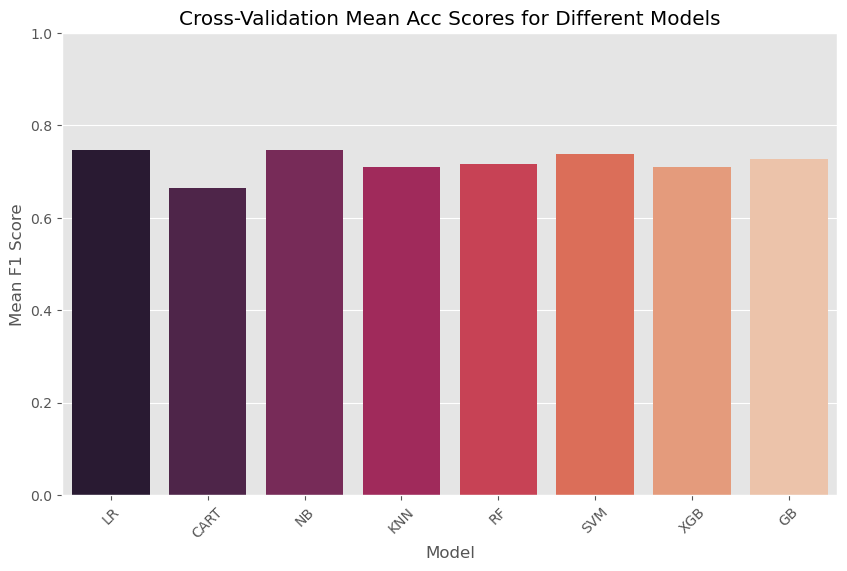

In [76]:
mean_acc_df_unk = pd.DataFrame(list(mean_acc_scores_unk.items()), columns=['Model', 'Mean F1 Score'])

# Plotting mean F1 scores using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean F1 Score', data=mean_acc_df_unk, palette= "rocket")
plt.title('Cross-Validation Mean Acc Scores for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (F1 score range)
plt.show()

In [77]:
mean_acc_scores_freq = {}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    cv_scores = cross_val_score(model, X_train_freq, y_train_freq, cv=kfold, scoring='accuracy')
    mean_acc_scores_freq[model_name] = cv_scores.mean()
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}\n")

Evaluating model: LR
Cross-Validation Scores: [0.7    0.6875 0.7375 0.65   0.6875 0.775  0.75   0.7125 0.75   0.7375]
Mean Accuracy: 0.7188

Evaluating model: CART


Cross-Validation Scores: [0.6625 0.6125 0.6625 0.65   0.575  0.675  0.6625 0.5625 0.6125 0.625 ]
Mean Accuracy: 0.6300

Evaluating model: NB
Cross-Validation Scores: [0.6    0.675  0.725  0.65   0.6625 0.75   0.7    0.725  0.7625 0.725 ]
Mean Accuracy: 0.6975

Evaluating model: KNN
Cross-Validation Scores: [0.6625 0.6625 0.6375 0.65   0.6625 0.7125 0.6375 0.7    0.6375 0.7   ]
Mean Accuracy: 0.6663

Evaluating model: RF
Cross-Validation Scores: [0.7    0.675  0.675  0.65   0.6875 0.65   0.6125 0.775  0.75   0.6625]
Mean Accuracy: 0.6838

Evaluating model: SVM
Cross-Validation Scores: [0.725  0.7125 0.725  0.7    0.7    0.75   0.725  0.725  0.75   0.7   ]
Mean Accuracy: 0.7212

Evaluating model: XGB
Cross-Validation Scores: [0.6875 0.7    0.6875 0.6375 0.6625 0.7    0.6125 0.75   0.6875 0.6875]
Mean Accuracy: 0.6813

Evaluating model: GB
Cross-Validation Scores: [0.725  0.6875 0.675  0.6875 0.675  0.7625 0.7375 0.725  0.725  0.7125]
Mean Accuracy: 0.7113



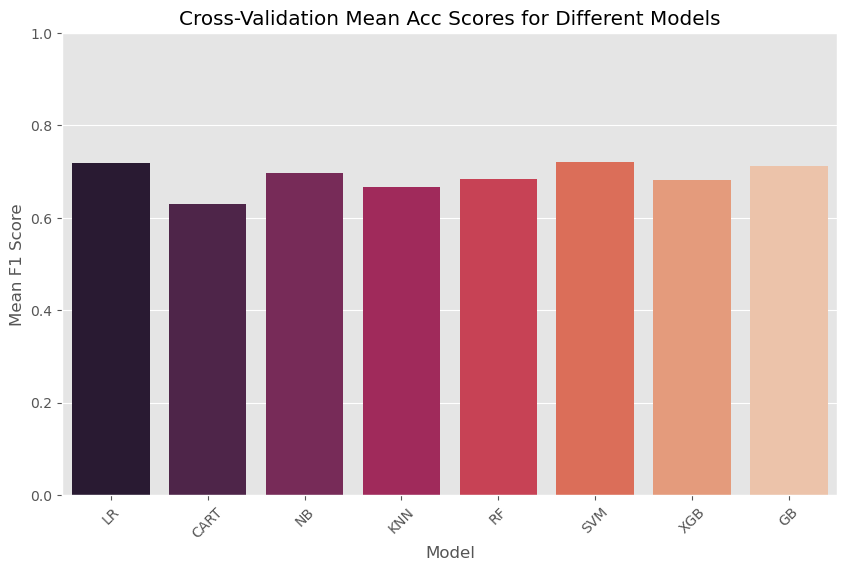

In [78]:
mean_acc_df_freq = pd.DataFrame(list(mean_acc_scores_freq.items()), columns=['Model', 'Mean F1 Score'])

# Plotting mean F1 scores using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Mean F1 Score', data=mean_acc_df_freq, palette = "rocket")
plt.title('Cross-Validation Mean Acc Scores for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (F1 score range)
plt.show()

The overall performance of LR, NB, SVM and GB turns out to be quite good and we will later investigate those models

In [79]:
from sklearn.metrics import precision_recall_curve, roc_curve
def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc

def print_metrics(y_true, y_pred):
    accuracy, precision, recall, f1_score, roc_auc = metrics(y_true, y_pred)
    print("Accuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1 Score: %.3f\nROC AUC: %.3f" % (accuracy, precision, recall, f1_score, roc_auc))


In [80]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

# Result

In [83]:
def plot_roc_auc(model, name, X_test, y_test):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model {name} does not support probability prediction.")
    
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')


Naive Bayes

In [84]:
nb_unk = GaussianNB()
nb_unk.fit(X_train_unk, y_train_unk)
nb_freq = GaussianNB()
nb_freq.fit(X_train_freq, y_train_freq)

GaussianNB()

Logistic regression

In [85]:
lr_unk =LogisticRegression(random_state=42, max_iter=10000)
lr_unk.fit(X_train_unk, y_train_unk)
lr_freq =LogisticRegression(random_state=42, max_iter=10000)
lr_freq.fit(X_train_freq, y_train_freq)

LogisticRegression(max_iter=10000, random_state=42)

In [86]:
svm_unk = SVC(random_state=42)
svm_unk.fit(X_train_unk, y_train_unk)
svm_freq = SVC(random_state=42)
svm_freq.fit(X_train_freq, y_train_freq)

SVC(random_state=42)

In [87]:
gb_unk = GradientBoostingClassifier(random_state=42)
gb_unk.fit(X_train_unk, y_train_unk)
gb_freq = GradientBoostingClassifier(random_state=42)
gb_freq.fit(X_train_freq, y_train_freq)

GradientBoostingClassifier(random_state=42)

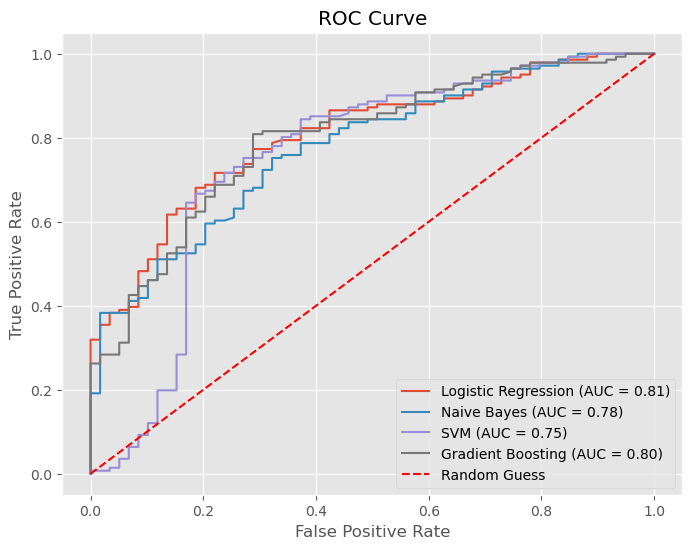

In [88]:
plt.figure(figsize=(8, 6))

plot_roc_auc(lr_unk, "Logistic Regression", X_test_unk, y_test_unk)
plot_roc_auc(nb_unk, "Naive Bayes", X_test_unk, y_test_unk)
plot_roc_auc(svm_unk, "SVM", X_test_unk, y_test_unk)
plot_roc_auc(gb_unk, "Gradient Boosting", X_test_unk, y_test_unk)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

plt.legend()
plt.show()

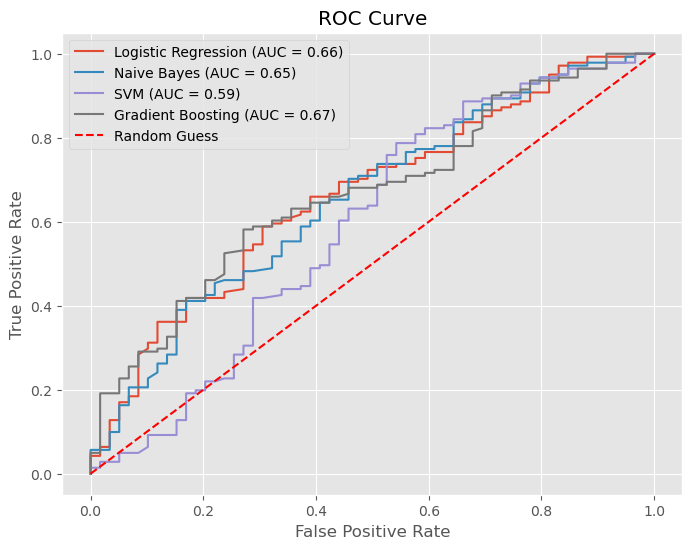

In [89]:
plt.figure(figsize=(8, 6))

plot_roc_auc(lr_freq, "Logistic Regression", X_test_freq, y_test_freq)
plot_roc_auc(nb_freq, "Naive Bayes", X_test_freq, y_test_freq)
plot_roc_auc(svm_freq, "SVM", X_test_freq, y_test_freq)
plot_roc_auc(gb_freq, "Gradient Boosting", X_test_freq, y_test_freq)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')

plt.legend()
plt.show()